# SLITD's e EDLCC's

## Introdução

Ferramentas computacionais têm uma grande importância na análise e projeto de sinais e sistemas modernos. Equações de Diferenças Lineares com Coeficientes Constantes (EDLCC's) são fundamentais na representação/descrição de sistemas simples e mais complexos. Felizmente, ferramentas de software atuais tornam possível a manipulação dessas EDLCC's em diversos domínios sem muito esforço. <p>Equações de Diferenças Lineares de Coeficientes Constantes são completamente caracterizadas pelos conjuntos de coeficientes ${a_k}$ e ${b_k}$. Podemos usar tais ferramentas como **PyLab** (apresentação gráfica) e o pacote *signal* do **Scipy** (computação científica) para projetar filtros de alta performance, particularmente no domínio do tempo discreto. As funções de projeto de filtros calculam os coeficientes ${a_k}$ e ${b_k}$ em resposta aos requisitos de projeto fornecidos pelo projetista. Em geral, usamos os projetos de filtros na simulação de sistemas maiores.

Os sistemas são representados por EDLCC's, normalmente, em três domínios: tempo, frequência e Z (freq. complexa). Os conjuntos de coeficientes constantes, $a_k$ e $b_k$, existem e são os mesmos nos três domínios citados. Portanto, esses **coeficientes definem o sistema** em qualquer que seja o domínio de representação.

Aqui estão algumas da relações entrada-saída nos domínios citados:
<ul><li>Domínio do tempo: **Resposta ao Impulso**: $$y[n]=\sum_{k=-\infty}^{\infty}x[k].h[n-k]$$</li>
<li>Domínio do tempo: **EDLCC**:</li><p>$$y[n]+a_1.y[n-1]+...+a_{N-1}.y[n-(N-1)+a_N.y[n-N]=b_0.x[n]+b_1.x[n-1]+...+b_{M-1}.x[n-(M-1)+b_M.x[n-M]\;\;\;\;\;\;(1)$$
<p>$$y[n]=\sum_{k=0}^{M}{b_k.x[n-k]}-\sum_{k=1}^{N}{a_k.y[n-k]}$$
<li>Domínio Z: **Função de Transferência**: $$H(z)=\frac{\sum_{k=0}^{M-1}b_k.X(z-k)}{\sum_{k=1}^{N-1}a_k.Y(z-k)}$$</li>
<li>Domínio da frequência: **Resposta em Frequência**: $$H(\Omega)=\frac{\sum_{k=0}^{M-1}b_k.X(\Omega-\Omega_k)}{\sum_{k=1}^{N-1}a_k.Y(\Omega-\Omega_k)}$$</li></ul>

A resposta ao impulso, $h[n]$, convoluída pela entrada, $x[n]$, produz a saída do sistema, $y[n]$.
O teorema da convolução para as transformadas de Fourier aplicado à resposta ao impulso, $h[n]$, produz a **Resposta em Frequência** do sistema, $H(\Omega)$, ou seja, a razão do espectro da saída pelo espectro da entrada, $Y(\Omega)/X(\Omega)$.

O teorema da convolução para a Transformada-z produz a saída no domínio z, $Y(z)$, como produto da entrada, $X(z)$, e a **Função Sistema (Função de Transferência)**, $H(z)$, que é a Transformada-z da **Resposta ao Impulso**.

### EDLCC - Resposta ao Impulso

A Resposta ao Impulsiva de um SLITD, $h[n]$ pode ser obtida resolvendo-se a equação (1) para a entrada $x[n]=\delta[n]$ e assumindo o SLITD em repouso. <p>Para um sistema **não recursivo**, ou seja, $a_k=0$ para $k = 1,2,...N$, a equação (1)  torna-se:
$$y[n]=h[n]=\sum_{k=0}^M b_k.\delta[n-k]$$

#### Classificação de SLITD's Quanto a Duração da Resposta ao Impulso

Se a Resposta Impulsiva $h[n]$ for finita, então o SLITD é classificado como sendo do tipo **FIR - *Finite Impulse Response***. 
<p>Porém, se $a_k\neq0$, a Resposta Impulsiva $h[n]$ será de duração infinita, e o SLITD será classificado como sendo do tipo **IIR - *Infinite Impulse Response***.

### Resolução de EDLCC's

Existem vários métodos de resolução de uma EDLCC, para uma determinada entrada $x[n]$ e condições iniciais do SLITD: 

<ol><li>**Iterativo**:</li>
Baseia-se na construção de uma tabela de valores da entrada e da saída, a partir da avaliação da EDLCC para cada tempo $n$. Esse método é indicado quando se deseja calcular alguns poucos valores da saída (método essencialmente computacional) a partir do instante nulo: $n=0$. 

<li>**Clássico** (Analítico):</li>
Resolução de equações diferenciais (usando autofunções como possíveis soluções da equação), que consiste em obter a solução homogênea  e a solução particular. Esse método é indicado quando se deseja conhecer o valor da saída para qualquer instante de tempo, visto que o método redunda numa expressão fechada para a saída, $y[n]$.

<li>**Transformada-Z**:</li> 
Consistem na aplicação da Transformada-z Direta à EDLCC, para obter uma equação algébrica de fácil solução. Em seguida, aplica-se a Transformada-Z Inversa para obter a resposta do SLITD no domínio do tempo. Esse método, também, é indicado quando se deseja conhecer o valor da saída para qualquer instante de tempo, visto que o método redunda numa expressão fechada para a saída, $y[n]$.


### Ferramentas Computacionais

A figura seguinte mostra as funções chaves em **PyLab** e no módulo *signal* do pacote **Scipy** usadas na análise dos sistemas de tempo discreto nos diversos domínios.

<img src="fig1.png">

<ul><li>**Domínio do Tempo**: você resolve equações de diferenças usando <span style="font-family:Courier New; font-size:1.em;">signal.lfilter(b,a,x)</span>.
<li>**Domínio z**: você pode encontrar o plano de polos e zeros da Função de Transferência $H(z)$ do sistema, usando <span style="font-family:Courier New; font-size:1.em;">ssd.zplane(b,a)</span>; e pode fazer a expansão em frações parciais, usando <span style="font-family:Courier New; font-size:1.en;">signal.residuez</span>.</li>
<li>**Domínio da Frequência**: você pode encontrar a Resposta em Frequência $H(\Omega)$ de um sistema de tempo discreto com <span style="font-family:Courier New; font-size:1.em;">signal.freqz(b,a,2\*pi\*f)</span>, onde $f$ é a variável frequência.</li>

## Procedimentos

<ol><li>Seja um SLITD relaxado (c.i.’s nulas) descrito por sua EDLCC de segunda ordem:
<p><p>$$y[n] + 0,6 y[n-2] = 0,3x[n] + 0,5x[n-1] + 0,3x[n-2]$$
<p>Desenvolva um *script* para calcular e traçar a resposta do SLITD às seguintes entradas, usando o **método iterativo** para solucionar a EDLCC, $-5\leq n\leq20$:
<p><ol><li>Impulso unitário: $x[n]=\delta[n]$</li>
<li>Degrau unitário: $x[n]=u[n]$</li>
<li>Exponencial: $x[n]=3.(0,4)^nu[n]$</li></ol>

Populating the interactive namespace from numpy and matplotlib


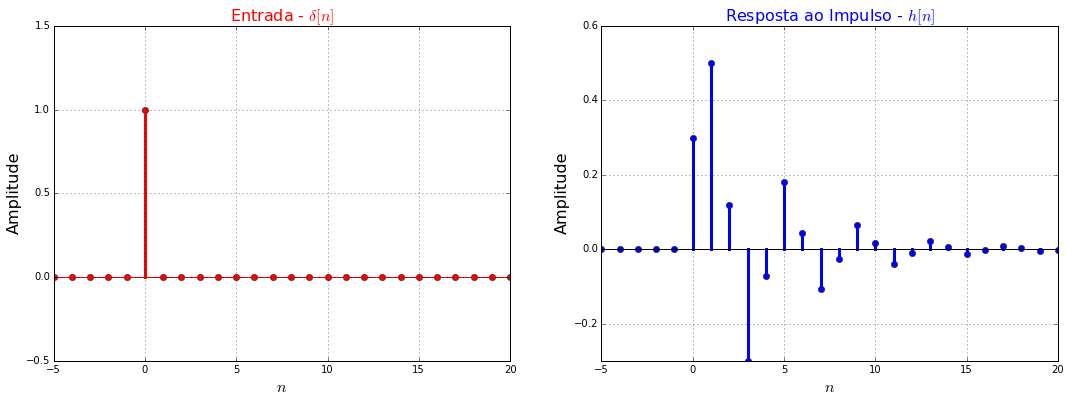

In [5]:
% pylab inline
# Procedimento 1 - letra (A)
from numpy import arange, zeros
from pylab import stem, title, xlabel, ylabel, subplot, grid, ylim, subplots
n = arange(-5,21)               # base de tempo
N = 2                           # ordem do SLITD: max_atraso(x,y)
iot = 5                         # índice da origem dos tempos
x = zeros(len(n)); x[iot] = 1   # entrada: impulso unitário
y = zeros(len(n))               # condições iniciais nulas

# print ' n   y[n]'
for item in n[N:]:
  m = item + iot                # posição no vetor
  y[m] = -0.6*y[m-2] + 0.3*x[m] + 0.5*x[m-1] + 0.3*x[m-2]   # EDLCC
  # print '%2d %+7.5f' % (item,y[m])

subplots(figsize=(18,6))        # estipula espaço físico para os gráficos

# Gráfico 1: sinal da Entrada, x[n]
subplot(121)
marca,linha,eixo = stem(n,x)
setp(marca,'markerfacecolor', 'r'); setp(linha,'color', 'r'); setp(linha,'linewidth',3)
title('Entrada - $\delta[n]$',fontsize=16,color='r')
grid('on'); xlabel('$n$',fontsize=16); ylabel('Amplitude',fontsize=16); ylim(-0.5,1.5)

# Gráfico 2: sinal da Saída, y[n]
subplot(122)
marca,linha,eixo = stem(n,y)
setp(eixo,'color','k'); setp(linha,'linewidth',3)
title('Resposta ao Impulso - $h[n]$',fontsize=16,color='b')
grid('on'); xlabel('$n$',fontsize=16); ylabel('Amplitude',fontsize=16)

<ol><li value=2>Implemente o SLITD do item anterior usando a função de filtragem (*filter* no Matlab e *lfilter* no pacote scipy.signal do Python) e calcule novamente as saídas do sistema para as entradas sugeridas naquele item.

<span style="font-family:Courier New; font-size:1.3em;">y,zf = lfilter(b, a, x, axis=-1, zi=None)</span>

<p style="margin-left: 30px">Esta função filtra a sequência de dados **$x$** usando o filtro digital definido pelos coeficientes **$b$** e **$a$**.  Isto vale para muitos tipos de dados fundamentais (incluindo o tipo *Object*).  O filtro resultante é uma implementação da equação de diferenças padrão na forma Direta Transposta II.
</li>
<p><center>$a[0]*y[n]=b[0]*x[n]+b[1]*x[n-1]+..+b[M-1]*x[n-(M-1)]-a[1]*y[n-1]-...-a[N-1]*y[n-(N-1)]$
<p style="margin-left: 30px">**Parâmetros**:
<p style="margin-left: 45px">$b$ - vetor 1D com os coeficientes que multiplicam a sequência de entrada
<p style="margin-left: 45px">$a$ - vetor 1D com os coeficientes que multiplicam a sequência de saída. Se $a[0]$ não for 1, então $a$ e $b$ serão normalizados por $a[0]$
<p style="margin-left: 45px">$x$ - vetor *N*-dimensional com o sinal de entrada
<p style="margin-left: 45px">$axis$ - valor do tipo *int* que indica o eixo dos dados de entrada ao longo do qual será aplicado o filtro linear
<p style="margin-left: 45px">$zi$ -	vetor opcional, com as condições iniciais para os atrasos do filtro. Ele é um vetor de comprimento *max(len(a),len(b))-1*.  Se $zi$ for *None* ou não for dado então o sistema será considerado em repouso. Veja **lfiltic** para mais informações sobre condições iniciais
<p style="margin-left: 30px">**Retorno**:
<p style="margin-left: 45px">$y$ - vetor com a saída do filtro digital
<p style="margin-left: 45px">$zf$ - vetor opcional. Se $zi$ for *None*, este vetor não será retornado, caso contrário, $zf$ conterá os valores finais do atraso do filtro.

<ol><li value=3>Calcule $h[n]$ analiticamente para o SLITD descrito pela equação de diferenças dada no item 1, e trace o gráfico de hastes (*stem*) da Resposta ao Impulso para $0\leq n\leq127$.</li>

<ol><li value=4>Crie um trem de impulsos centrado na origem com largura de 7 amostras e com período de 128 amostras (considere $-63\leq n \leq64$). Esboce a resposta do SLITD do item 1 para o sinal trem de impulsos criado nesse item, usando as funções de convolução, *numpy.convolve()* ou *scipy.signal.convolve()*, e filtragem, *scipy.signal.lfilter()*.</li>

<ol><li value=5>Determine as saídas do SLITD do item 1 para os sinais de entrada $x1[n] = cos(0,1\pi.n)$  e  $x2[n] = cos(0,9\pi.n)$, para $0\leq n\leq127$. Explique as respostas observadas, relacionando amplitudes e frequências.</li></ol>

## Questões

<ol><li>Seja um SLITD somador, causal, em repouso (no domínio do tempo contínuo, tal sistema é chamado de **integrador**) – um sistema cuja saída no instante $n$, $y[n]$, é a soma da entrada $x[n]$ até o instante $n$ (inclusive). Determine a função de transferência e a resposta ao impulso desse SLITD. Classifique o sistema quanto ao tipo da resposta ao impulso.</li>
$$y[n]=\sum_{k=-\infty}^n x[k]$$
<li>Compare as respostas obtidas no item 5 dos **Procedimentos** com aquelas obtidas com o sistema em repouso descrito pela seguinte *Função de Transferência*, quando submetido às mesmas entradas.</li>
$$H(z)=\frac{z}{(z-1)(z-0,5)},\;\;\;\;\mid z \mid \gt 1$$

Fonte: http://www.dummies.com/how-to/content/how-to-use-pylab-for-lcc-differential-and-differen.html